In [ ]:
import pandas as pd

In [ ]:
df_sales = pd.read_csv('/content/SalesTransactionv4a-230918-164139.csv')

In [ ]:
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


# Data Cleansing
Eksekusi 2 code dibawah ini

In [ ]:
# 1. Ubah kolom Date menjadi tipe datetime
df_sales['Date']= pd.to_datetime(df_sales['Date'])

# 2. Buang semua transaksi yang memiliki quantity negative atau yang TransactionNo diawali dengan C
df_sales = df_sales[df_sales['TransactionNo'].str[0]!='C']

In [ ]:
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom


# RFM (Recency, Frequency, Monetary) Analysis

## Membuat kolom 'TotalRevenue'

In [ ]:
# Menghitung TotalRevenue per TransactionNo dan assign ke dataframe baru
df_sales['TotalRevenue'] = df_sales['Price'] * df_sales['Quantity']
df_sales

<ipython-input-6-7d6ced0ef271>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['TotalRevenue'] = df_sales['Price'] * df_sales['Quantity']


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalRevenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64
...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45


## Menghitung Nilai Recency, Frequency, dan Monetary untuk Setiap Pelanggan

### Menghitung Recency

Recency mengacu pada berapa lama waktu telah berlalu sejak pembelian terakhir yang dilakukan oleh seorang customer.

In [ ]:
# Menghitung recency
df_recency = df_sales.groupby(by=['CustomerNo'], as_index=False)['Date'].max()
df_recency.columns = ['CustomerNo', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

### Menghitung Frequency

Frequency mengacu pada seberapa sering seorang pelanggan melakukan pembelian dalam periode waktu tertentu.

In [ ]:
# Menghitung frequency
frequency_df = df_sales.groupby(by=['CustomerNo'], as_index=False)['TransactionNo'].nunique()
frequency_df.columns = ['CustomerNo', 'Frequency']

### Menghitung Monetary

Monetary mengacu pada total nilai uang yang telah dihabiskan oleh seorang pelanggan dalam periode waktu tertentu.

In [ ]:
# Menghitung monetary
monetary_df = df_sales.groupby(by=['CustomerNo'], as_index=False)['TotalRevenue'].sum()
monetary_df.columns = ['CustomerNo', 'Monetary']

### Menggabungkan Recency, Frequency, dan Monetary  Dalam 1 Dataframe

In [ ]:
# Merge RFM
rf_df = df_recency.merge(frequency_df, on='CustomerNo')
rfm_df = rf_df.merge(monetary_df, on='CustomerNo').drop(columns='LastPurchaseDate')

rfm_df

,CustomerNo,Recency,Frequency,Monetary
0,12004.0,227,1,1509.60
1,12006.0,218,1,24.76
2,12008.0,276,1,5689.57
3,12013.0,359,1,69.96
4,12024.0,176,1,149.52
...,...,...,...,...
4713,18280.0,277,1,623.26
4714,18281.0,180,1,576.58
4715,18282.0,7,2,1044.86
4716,18283.0,3,16,12114.61


## Menentukan Skor RFM

Dalam menentukan skor RFM bisa dilakukan dengan beberapa pendekatan, salah satunya quantile-based scoring. Yaitu membagi data menjadi beberapa kelompok (quantile) dan memberikan skor berdasarkan kelompok tersebut. Misalnya, membagi data Recency menjadi 4 kelompok (quantile) dan memberikan skor 1-4, di mana skor 4 untuk Recency terendah (pelanggan paling baru). Sementara untuk Frequency, skor 4 merupakan skor Frequency tertinggi.

In [ ]:
# Menentukan Skor RFM (Quantile-based scoring)
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

# Fungsi untuk menghitung skor Recency (R_Quartile)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Fungsi untuk menghitung skor Frequency dan Monetary (F_Quartile, M_Quartile)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Mengaplikasikan fungsi
rfm_df['R_Quartile'] = rfm_df['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_df['F_Quartile'] = rfm_df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_df['M_Quartile'] = rfm_df['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

# Menggabungkan skor RFM menjadi RFMScore
rfm_df['RFMScore'] = rfm_df.R_Quartile.map(str) \
                            + rfm_df.F_Quartile.map(str) \
                            + rfm_df.M_Quartile.map(str)

rfm_df

,CustomerNo,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12004.0,227,1,1509.60,1,1,1,111
1,12006.0,218,1,24.76,1,1,1,111
2,12008.0,276,1,5689.57,1,1,3,113
3,12013.0,359,1,69.96,1,1,1,111
4,12024.0,176,1,149.52,1,1,1,111
...,...,...,...,...,...,...,...,...
4713,18280.0,277,1,623.26,1,1,1,111
4714,18281.0,180,1,576.58,1,1,1,111
4715,18282.0,7,2,1044.86,4,2,1,421
4716,18283.0,3,16,12114.61,4,4,4,444


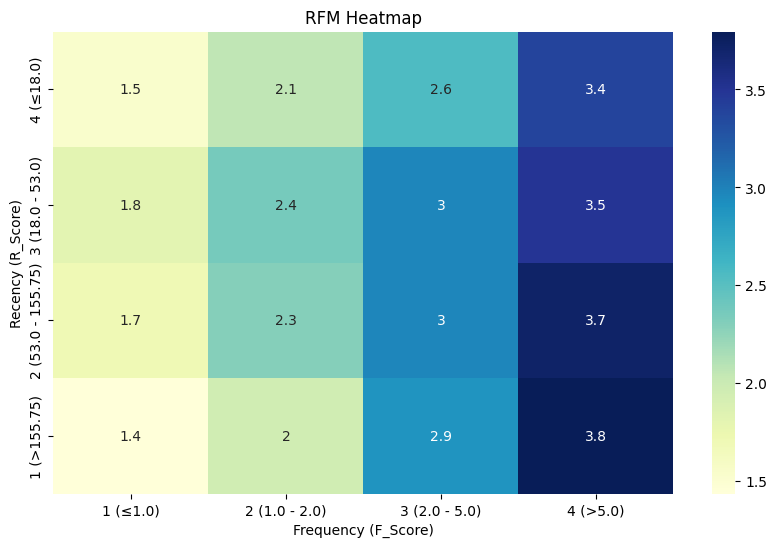

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat tabel pivot untuk heatmap
rfm_heatmap = rfm_df.groupby(['R_Quartile', 'F_Quartile'])['M_Quartile'].mean().unstack()

# Membuat heatmap
fig, ax = plt.subplots(figsize=(10, 6))  # Membuat figure dan axes
sns.heatmap(rfm_heatmap, annot=True, cmap='YlGnBu', ax=ax)  # Membuat heatmap pada axes


# Menambahkan range nilai Recency pada sumbu y
ax.set_yticklabels([
    f"4 (≤{quantiles['Recency'][0.25]})",
    f"3 ({quantiles['Recency'][0.25]} - {quantiles['Recency'][0.50]})",
    f"2 ({quantiles['Recency'][0.50]} - {quantiles['Recency'][0.75]})",
    f"1 (>{quantiles['Recency'][0.75]})"
])

# Menambahkan range nilai Frequency pada sumbu x
ax.set_xticklabels([
    f"1 (≤{quantiles['Frequency'][0.25]})",
    f"2 ({quantiles['Frequency'][0.25]} - {quantiles['Frequency'][0.50]})",
    f"3 ({quantiles['Frequency'][0.50]} - {quantiles['Frequency'][0.75]})",
    f"4 (>{quantiles['Frequency'][0.75]})"
])

plt.xlabel('Frequency (F_Score)')
plt.ylabel('Recency (R_Score)')
plt.title('RFM Heatmap')
plt.show()

## Segmentasi Customer

Setelah menghitung nilai RFM, kita akan mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku pembelian mereka. Pengelompokan ini dilakukan dengan menggunakan skor RFM yang telah dihitung sebelumnya.

Misalnya:
1. Champions (444): Pelanggan dengan skor RFM tertinggi (444) dianggap sebagai "Champions". Mereka adalah pelanggan terbaik yang sering membeli, baru saja membeli, dan menghabiskan banyak uang.
2. Loyal Customers (X4X): Pelanggan dengan skor Frequency 4, terlepas dari skor Recency dan Monetary, dianggap sebagai "Loyal Customers". Mereka sering melakukan pembelian.
3. At Risk (2XX): Pelanggan dengan skor Recency 2, terlepas dari skor Frequency dan Monetary, dianggap sebagai "At Risk". Mereka sudah agak lama tidak melakukan pembelian dan berpotensi untuk churn.
4. Lost (111): Pelanggan dengan skor RFM terendah (111) dianggap sebagai "Lost". Mereka sudah lama tidak membeli, jarang membeli, dan tidak menghabiskan banyak uang.

In [ ]:
# Mengelompokkan customer ke dalam segment
def segment_customer(rfm_score):
    if rfm_score == '444': # Jika skor RFM adalah '444', maka segmen = 'Champions'
        return 'Champions'
    elif rfm_score[1] == '4': # Jika skor Frequency adalah 4, maka segmen = 'Loyal Customers'
        return 'Loyal Customers'
    elif rfm_score in ('333', '343'): # Jika skor RFM adalah '333' atau '343', maka segmen = 'Potential Loyalist'
        return 'Potential Loyalist'
    elif rfm_score[0] == '4': # Jika skor Recency adalah 4, maka segmen = 'Recent Customers'
        return 'Recent Customers'
    elif rfm_score in ('311', '211', '321', '331'): # Jika skor RFM adalah salah satu dari ('311', '211', '321', '331'), maka segmen = 'Promising'
        return 'Promising'
    elif rfm_score in ('222', '223', '233', '322', '332'): # Jika skor RFM adalah salah satu dari ('222', '223', '233', '322', '332'), maka segmen = 'Customers Needing Attention'
        return 'Customers Needing Attention'
    elif rfm_score[0] == '2': # Jika skor Recency adalah 2, maka segmen = 'At Risk'
        return 'At Risk'
    elif rfm_score in ('144', '134', '143', '133', '124', '123'): # Jika skor RFM adalah salah satu dari ('144', '134', '143', '133', '124', '123'), maka segmen = "Can't Lose Them"
        return 'Can\'t Lose Them'
    elif rfm_score[0] == '1': # Jika skor Recency adalah 1, maka segmen = 'Hibernating'
        return 'Hibernating'
    else:
        return 'Lost' # Jika tidak memenuhi kondisi di atas, maka segmen = 'Lost' (termasuk jika skor RFM adalah '111')

# Mengaplikasikan fungsi segment_customer ke kolom 'RFMScore' untuk membuat kolom 'Segment'
rfm_df['Segment'] = rfm_df['RFMScore'].apply(segment_customer)

rfm_df

,CustomerNo,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,12004.0,227,1,1509.60,1,1,1,111,Hibernating
1,12006.0,218,1,24.76,1,1,1,111,Hibernating
2,12008.0,276,1,5689.57,1,1,3,113,Hibernating
3,12013.0,359,1,69.96,1,1,1,111,Hibernating
4,12024.0,176,1,149.52,1,1,1,111,Hibernating
...,...,...,...,...,...,...,...,...,...
4713,18280.0,277,1,623.26,1,1,1,111,Hibernating
4714,18281.0,180,1,576.58,1,1,1,111,Hibernating
4715,18282.0,7,2,1044.86,4,2,1,421,Recent Customers
4716,18283.0,3,16,12114.61,4,4,4,444,Champions


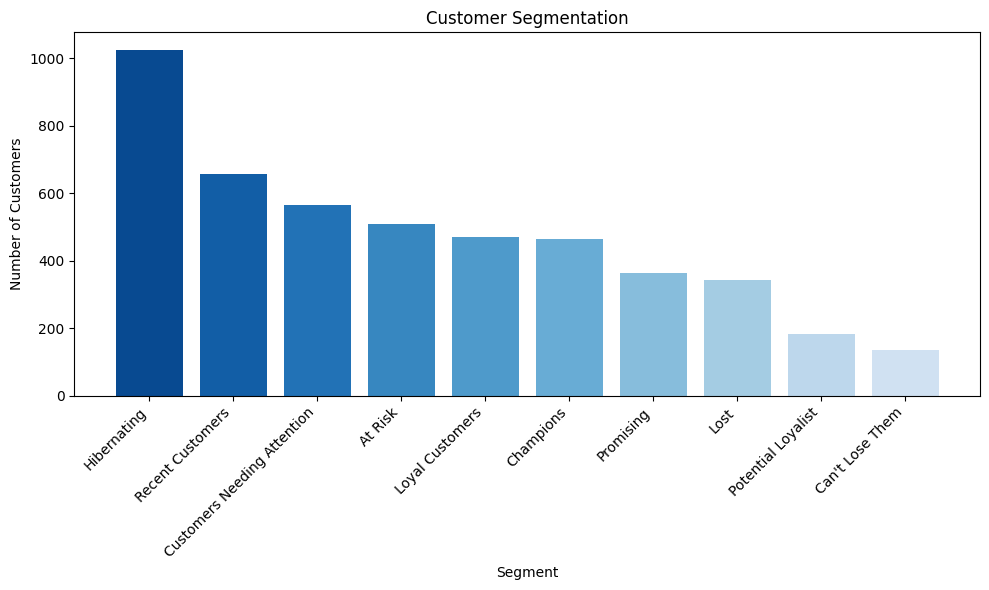

In [ ]:
import numpy as np
import matplotlib.cm as cm  # Import cm untuk colormap

# Menghitung jumlah pelanggan per segmen
segment_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False)

# Membuat list warna dengan gradasi biru tua ke biru muda
num_segments = len(segment_counts)
colors = [cm.Blues(i) for i in np.linspace(0.9, 0.2, num_segments)]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(segment_counts.index, segment_counts.values, color=colors)
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Proporsi Segmen

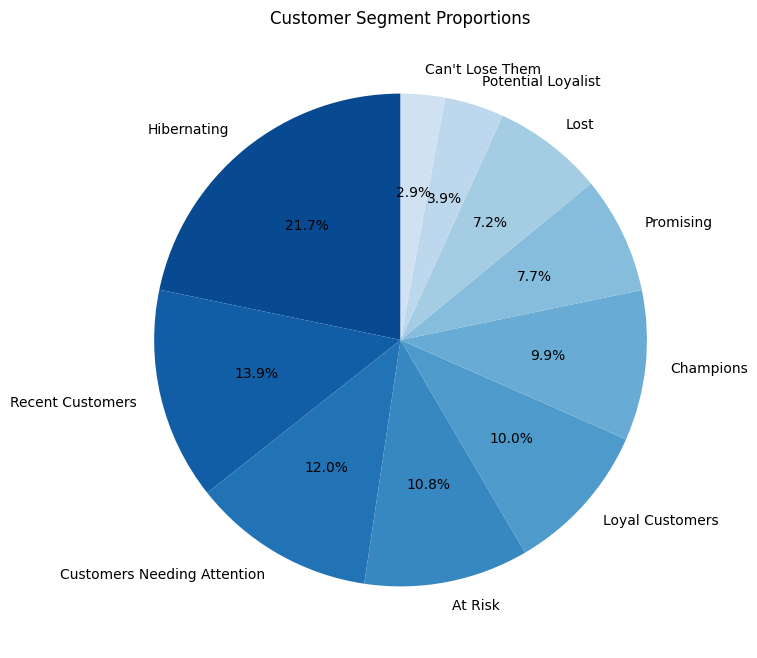

In [ ]:
# Menghitung jumlah customer per segmen
segment_counts = rfm_df['Segment'].value_counts()

# Menghitung proporsi setiap
segment_proportions = (segment_counts / segment_counts.sum()) * 100

# Membuat list warna
num_segments = len(segment_counts)
colors = [cm.Blues(i) for i in np.linspace(0.9, 0.2, num_segments)]

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_proportions.values,
        labels=segment_proportions.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)
plt.title('Customer Segment Proportions')
plt.show()

# Kesimpulan


*   **Segmen terbesar:** Segmen "Hibernating" memiliki jumlah pelanggan terbesar. Ini menunjukkan bahwa sebagian besar pelanggan saat ini tidak aktif atau jarang melakukan transaksi.
*   **Segmen terkecil:** Segmen "Can't Lose Them" memiliki porsi paling kecil. Ini menunjukkan bahwa hanya ada sedikit customer yang berisiko churn tetapi memiliki nilai tinggi.
*   Segmen "Champion" yang merupakan segmen customer paling berharga, juga memiliki proporsi yang relatif rendah.
*   Segmen "Recent Customer" memiliki proporsi yang lebih tinggi dibanding sebagian besar segmen lainnya. Hal ini berarti bahwa masih ada cukup banyak customer yang baru melakukan transaksi. Mereka berpotensi untuk menjadi "Loyal Customer" atau bahkan "Champion".




# Rekomendasi

1.   Karena segmen "Hibernating" merupakan segmen terbesar, penting untuk fokus pada upaya reaktifasi mereka. Misalnya dengan melakukan survey untuk mengetahui alasan mereka tidak aktif dan perbaiki masalah yang mendasarinya.
2.   Meskipun segmen "Potential Loyalist" dan "Champion" masih relatif kecil, mereka memiliki potensi tinggi untuk memberikan nilai jangka panjang bagi bisnis. Bisa dilakukan dengan memerikan reward dan insentif bagi customer yang sering bertransaksi dan menghabiskan banyak uang, contohnya customer pada segmen "Recent Customer" dan "Loyal Customer" agar dapat berpindah ke segmen "Champion".
3. Segmen "Can't Lose Them", meskipun jumlahnya sedikit, merupakan customer bernilai tinggi yang berisiko churn. Perlu dilakukan upaya khusus untuk mempertahankan mereka, misalnya dengan memberikan layanan eksklusif atau penawaran khusus.
4. Customer pada segmen "Customer Needing Attention" dan "At Risk" perlu diberikan perhatian ekstra. Misalnya dengan memberikan penawaran menarik atau program loyalitas untuk meningkatkan engagement dan mencegah churn.



